In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Create the Drone Network (Graph)
G = nx.erdos_renyi_graph(6, 0.5)  # Create a graph with 6 drones and random edges (50% chance)

In [ ]:

# Step 2: Assign Random Information (e.g., sensor readings) to Each Drone (Node)
for node in G.nodes:
    G.nodes[node]['information'] = random.randint(1, 100)  # Simulate sensor data (random number)

In [ ]:

# Step 3: Aggregate Information using a Simple Flooding Algorithm
def aggregate_information(graph):
    aggregated_data = {}
    for node in graph.nodes:
        neighbors = list(graph.neighbors(node))
        total_info = graph.nodes[node]['information']  # Start with the drone's own data
        for neighbor in neighbors:
            total_info += graph.nodes[neighbor]['information']  # Aggregate data from neighbors
        aggregated_data[node] = total_info / (len(neighbors) + 1)  # Average the information
        graph.nodes[node]['information'] = aggregated_data[node]  # Update node info
    return aggregated_data

In [ ]:
# Step 4: Run the Aggregation Process
aggregated_data = aggregate_information(G)

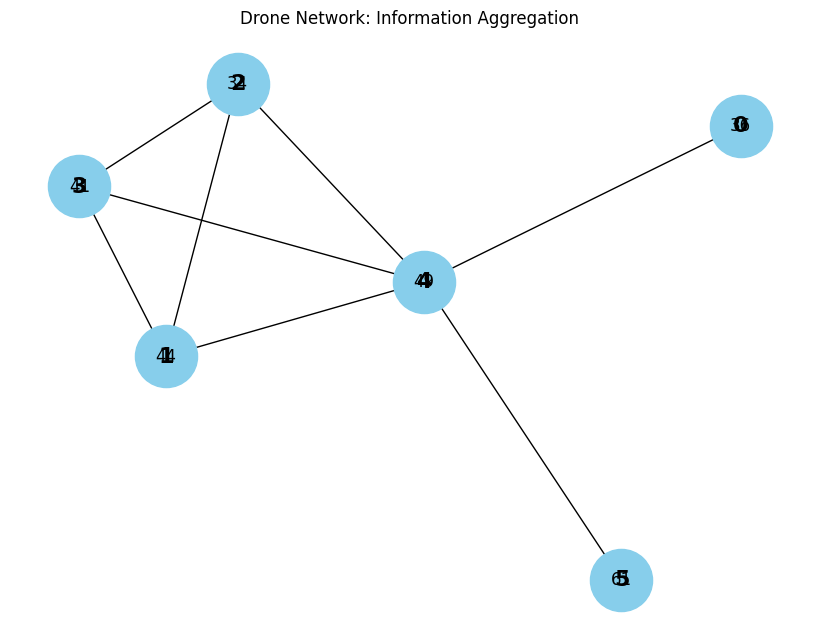

Aggregated Information (Sensor Data) for Each Drone:
Drone 0: 36.50
Drone 1: 44.25
Drone 2: 34.06
Drone 3: 41.83
Drone 4: 49.27
Drone 5: 61.14


In [ ]:

# Step 5: Visualize the Graph and Information Flow
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=16, font_weight='bold')

# Display information on each drone (node)
node_labels = {node: f"{int(aggregated_data[node])}" for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)

plt.title("Drone Network: Information Aggregation")
plt.show()

# Print the aggregated information for each drone
print("Aggregated Information (Sensor Data) for Each Drone:")
for node in aggregated_data:
    print(f"Drone {node}: {aggregated_data[node]:.2f}")
